# AXES STATISTICAL CHARTS

1. Autocorrelation plots

Autocorrelation plots are commonly used tool for checking randomness in a data set. 
This randomness is ascertained by computing autocorrelation for 
data values at varying time lags. It shows the properties of a type of 
data known as a time series. 
These plots are available in most general-purpose statistical software programs. 
It can be plotted using the pandas.plotting.autocorrelation_plot().

# 2. KDE plots

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
d = pd.read_csv('df_weed.csv')
d.head()

,Date,State,HighQ,MedQ,LowQ
0,2014-01-01,Alabama,339.06,198.64,149.49
1,2014-01-01,Alaska,288.75,260.60,388.58
2,2014-01-01,Arizona,303.31,209.35,189.45
3,2014-01-01,Arkansas,361.85,185.62,125.87
4,2014-01-01,California,248.78,193.56,192.92


<AxesSubplot:ylabel='Density'>

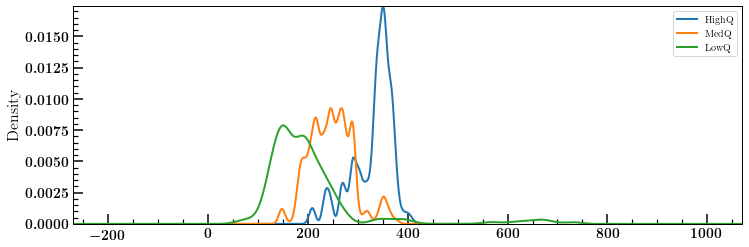

In [6]:
fig, ax= plt.subplots(figsize=(12,4))
d.plot.kde(ax=ax)

# 3. BOXPlots

In [13]:
d1 = pd.read_csv('altcoins.csv')
d1.head()

,Date,BTC,ETH,ETC,ZEC,DASH,LTC
0,4/28/2013,134.21,NaN,NaN,NaN,NaN,4.35
1,4/29/2013,144.54,NaN,NaN,NaN,NaN,4.38
2,4/30/2013,139.00,NaN,NaN,NaN,NaN,4.30
3,5/1/2013,116.99,NaN,NaN,NaN,NaN,3.80
4,5/2/2013,105.21,NaN,NaN,NaN,NaN,3.37


[None, None, None]

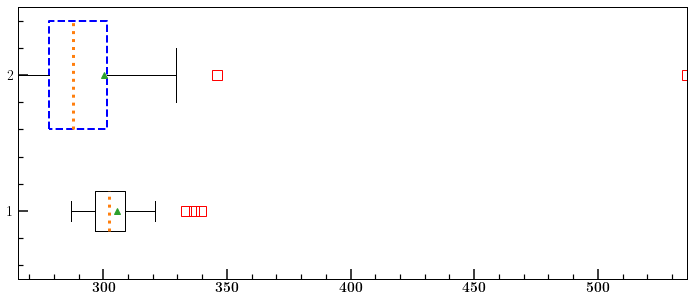

In [37]:
d1.fillna(0, inplace=True)
fig, ax1= plt.subplots(figsize=(12, 5))
data = d1.tail(30)
l = [data.ETH, data.DASH]
bp=ax1.boxplot(l, vert=False, widths=[0.3, 0.8], showmeans=True, showcaps=True,
            showfliers=True, medianprops=dict(linestyle='dotted', linewidth=3), 
            flierprops=dict(marker='s', markeredgecolor="r", markersize=10))
bp['boxes'][1].set(color='b', lw=2, ls='dashed')

# violin Plots

(0.5, 2.6)

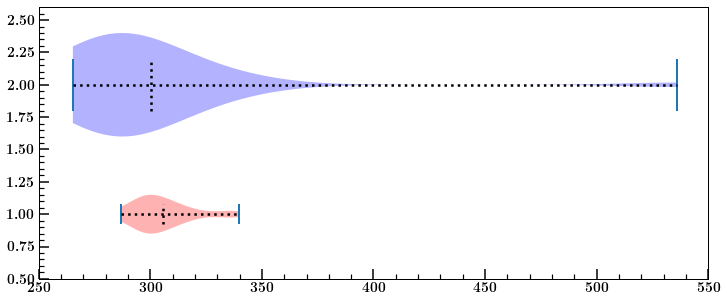

In [52]:
d1.head()
fig, ax2= plt.subplots(figsize=(12, 5))
l = [data.ETH, data.DASH]
vp=ax2.violinplot(l, vert=False, widths=[0.3, 0.8], showmeans=True,)
vp['bodies'][0].set(facecolor="red")
vp['bodies'][1].set(facecolor="blue")
vp['cbars'].set(linewidth=2.5, color="k", ls="dotted")
vp['cmeans'].set(linewidth=2.5, color="k", ls="dotted")
ax2.set_xlim(250, 550)
ax2.set_ylim(0.5, 2.6)

In [33]:
help(ax2.violinplot)

Help on method violinplot in module matplotlib.axes._axes:

violinplot(dataset, positions=None, vert=True, widths=0.5, showmeans=False, showextrema=True, showmedians=False, quantiles=None, points=100, bw_method=None, *, data=None) method of matplotlib.axes._subplots.AxesSubplot instance
    Make a violin plot.
    
    Make a violin plot for each column of *dataset* or each vector in
    sequence *dataset*.  Each filled area extends to represent the
    entire data range, with optional lines at the mean, the median,
    the minimum, the maximum, and user-specified quantiles.
    
    Parameters
    ----------
    dataset : Array or a sequence of vectors.
      The input data.
    
    positions : array-like, default: [1, 2, ..., n]
      The positions of the violins. The ticks and limits are
      automatically set to match the positions.
    
    vert : bool, default: True.
      If true, creates a vertical violin plot.
      Otherwise, creates a horizontal violin plot.
    
    width

# Heat MAP

In [62]:
d1 = pd.read_csv('altcoins.csv')
d1.head()
d1.dropna(inplace=True)
d1.head()

,Date,BTC,ETH,ETC,ZEC,DASH,LTC
1280,10/29/2016,714.48,10.44,0.889612,2044.47,8.61,4.09
1281,10/30/2016,701.86,11.18,0.927473,574.82,9.67,4.03
1282,10/31/2016,700.97,11.00,0.903216,1624.58,9.20,3.99
1283,11/1/2016,729.79,10.77,0.884664,1333.74,9.04,4.09
1284,11/2/2016,740.83,10.75,0.885256,942.78,8.94,4.10


In [63]:
cor_d1 = d1.corr()
cor_d1


,BTC,ETH,ETC,ZEC,DASH,LTC
BTC,1.000000,0.863730,0.685694,0.279518,0.910701,0.900221
ETH,0.863730,1.000000,0.928090,0.391908,0.917122,0.943395
ETC,0.685694,0.928090,1.000000,0.384311,0.772624,0.859662
ZEC,0.279518,0.391908,0.384311,1.000000,0.302269,0.340220
DASH,0.910701,0.917122,0.772624,0.302269,1.000000,0.948427
LTC,0.900221,0.943395,0.859662,0.340220,0.948427,1.000000


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


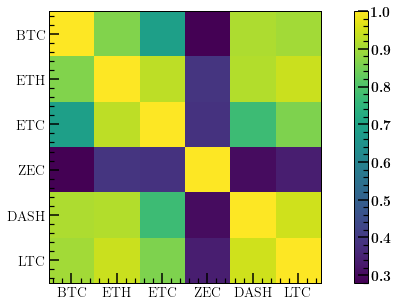

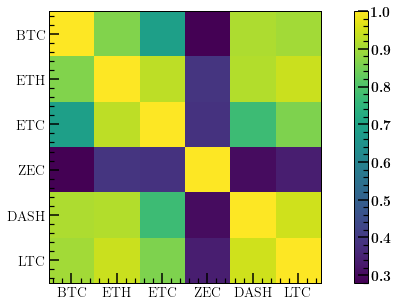

In [68]:
fig, ax1= plt.subplots(figsize=(12, 5))
cax=ax1.imshow(cor_d1.values)

ax1.set_xticklabels(d1.columns)
ax1.set_yticklabels(d1.columns)

fig.colorbar(cax)
fig